In [1]:
import sys
import numpy as np
from package.filtredcells import *
from itertools import product
from package.tessellations import *
from matplotlib import colormaps as cm

# Cube Tessellation on Torus 2d

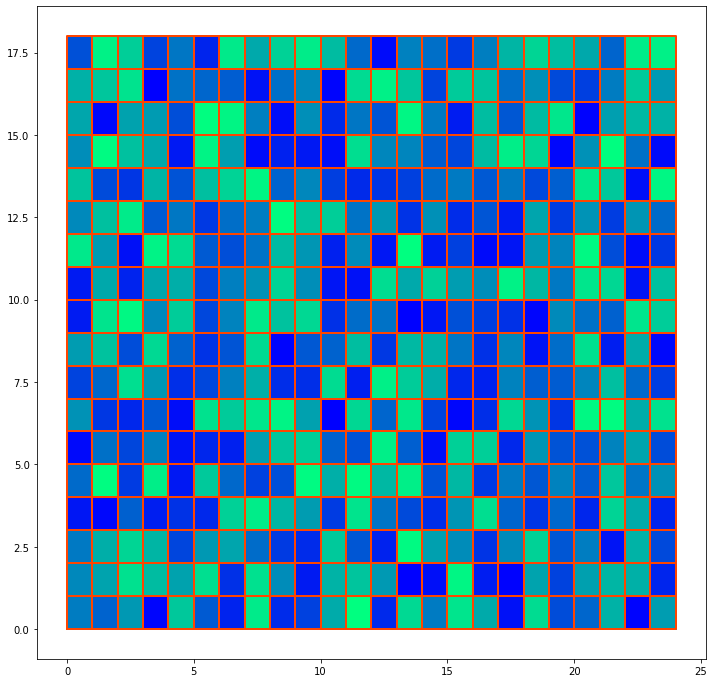

48


In [2]:
n, m = 24, 18
filtration = np.arange(n*m) / (n*m-1)
np.random.shuffle(filtration)
fc = get_cubical_tessellation_on_torus2d(n, m, filtration=filtration)

plt.figure(figsize=(12, 12))
fc.draw_filtration()
plt.show()

fc.initialize_complex(dimension=3)
fc.get_giant_cycles()

print(sys.getsizeof(fc))

# Hexagonal Tessellation on Torus 2d

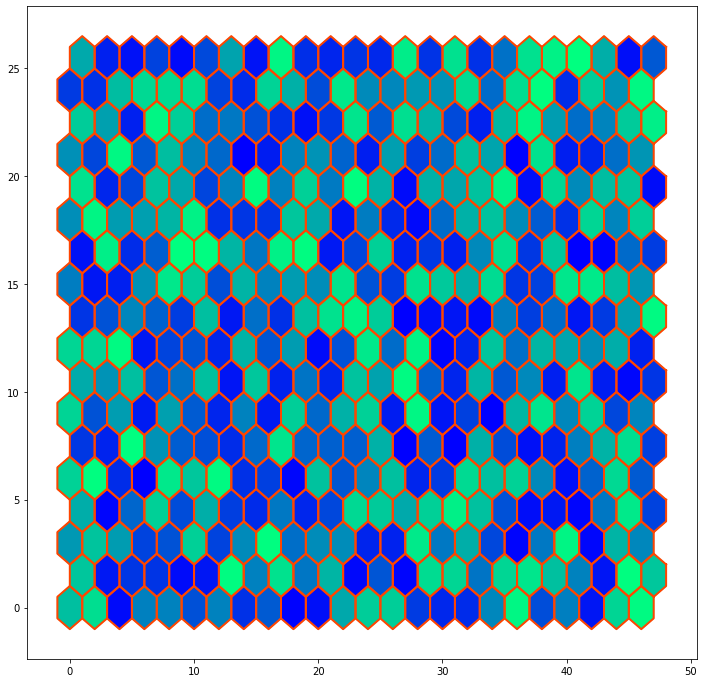

,Birth,Dimension
118,0.000703,0
119,0.455665,1
120,0.524931,1
121,0.998456,2


In [3]:
n, m, d = 24, 18, 9
filtration = np.random.random(n*m)
fc = get_hexagonal_tessolation_on_torus2d(n, m, d, filtration=filtration)

plt.figure(figsize=(12, 12))
fc.draw_filtration()
plt.show()

fc.initialize_complex(dimension=3)
fc.get_giant_cycles()

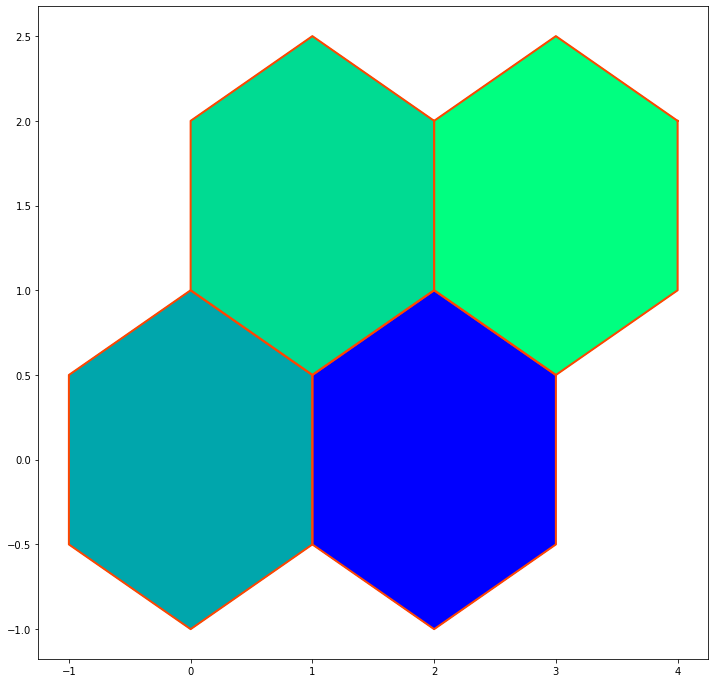

,Birth,Dimension
0,0.067465,0
1,0.791832,2
2,0.913301,2
3,0.913301,2
4,0.913301,2
5,0.913301,2


In [4]:
n = 2
filtration = np.random.random(n*n)
fc = get_hexagonal_tessolation_on_torus2d(n, filtration=filtration)

plt.figure(figsize=(12, 12))
fc.draw_filtration()
plt.show()

fc.initialize_complex(dimension=3)
fc.get_giant_cycles()

# Cube Tessellation on Torus 3d

In [5]:
n, m, k = 10, 10, 10
filtration = np.arange(n*m*k) / (n*m*k)
fc = get_cubical_tessellation_on_torus3d(n, m, k, filtration=filtration)

fc.initialize_complex(dimension=4)
fc.get_giant_cycles()

,Birth,Dimension
0,0.000,0
1,0.009,1
2,0.090,1
3,0.099,2
4,0.900,1
5,0.909,2
6,0.990,2
7,0.999,3


# Otcahedron Tessellation on Torus 3d

In [162]:
def get_octehedron_tessellation_on_torus3d(n: int, m=None, k=None, filtration=None):
    """
    Returns FiltredCells for octehedron tessellation on 3-dimensionall torus.
    
    Parameters:
    -----------
    n, m, k: int
        Half sizes of tessellation
        If m is None, that becomes same as n
        If k is None, that becames same as m
    
    filtration : array length 4*n*m*k or None
        Filtration values for cells. If that's None, that becames zeros.
        
    Returns:
    --------
    fc : FiltredCells
    """
    if m is None:
        m = n
    if k is None:
        k = m
    verts = np.array(list(product(np.arange(2*n), np.arange(2*m), np.arange(2*k))))
    verts = verts[verts.sum(axis=1) % 2 == 0]
    if False:#(np.array([n, m, k]) == 1).any():
        unit_cell = np.array([[[ 0,  0,  0], [ 1,  0,  0], [ 0,  1,  0], [ 0,  0,  1]], 
                              [[ 0,  0,  0], [ 1,  0,  0], [ 0,  1,  0], [ 0,  0, -1]], 
                              [[ 0,  0,  0], [ 1,  0,  0], [ 0, -1,  0], [ 0,  0,  1]], 
                              [[ 0,  0,  0], [ 1,  0,  0], [ 0, -1,  0], [ 0,  0, -1]], 
                              [[ 0,  0,  0], [-1,  0,  0], [ 0,  1,  0], [ 0,  0,  1]], 
                              [[ 0,  0,  0], [-1,  0,  0], [ 0,  1,  0], [ 0,  0, -1]], 
                              [[ 0,  0,  0], [-1,  0,  0], [ 0, -1,  0], [ 0,  0,  1]], 
                              [[ 0,  0,  0], [-1,  0,  0], [ 0, -1,  0], [ 0,  0, -1]]])
    else:
        unit_cell = np.array([[[-1,  0,  0], [ 1,  0,  0], [ 0,  1,  0], [ 0,  0,  1]], 
                              [[-1,  0,  0], [ 1,  0,  0], [ 0,  1,  0], [ 0,  0, -1]], 
                              [[-1,  0,  0], [ 1,  0,  0], [ 0, -1,  0], [ 0,  0,  1]], 
                              [[-1,  0,  0], [ 1,  0,  0], [ 0, -1,  0], [ 0,  0, -1]]])
    cells = np.array([vert + unit_cell for vert in verts])
    cells %= np.array([2*n, 2*m, 2*k])
    cells *= np.array([1, 2*n, 4*n*m])
    #cells *= (8*k*n*m)**np.arange(3) # не, не помогает; проблема не здесь
    cells = cells.sum(axis=-1)
    
    if filtration is None:
        filtration = np.zeros(4*n*m*k)
    fc = FiltredCells(cells, filtration=filtration)
    
    # create cords
    if True:
        if m is None:
            m = n
        if k is None:
            k = m
        cords = []
        unit_cord = np.array([[-1, 0], [0, 1], [1, 0], [0, -1]])
        for vert in verts:
            center = np.array([vert[1], vert[2] + (2*k+2)*vert[0]])
            cord = unit_cord + center
            cords.append(cord)
        cords = np.array(cords)
        fc.set_cords(cords)
        # create yticks
        fc.yticks = np.arange(2*n*(2*k+2)) - 1
        fc.ylabels = np.array([(fc.yticks+1) % (2*k+2) - 1, (fc.yticks+1) // (2*k+2)]).transpose()
        
    
    return fc

In [163]:
n, m, k = 3, 3, 3
filtration = np.arange(4*n*m*k) / (4*n*m*k)

#filtration = np.random.random(4*n*m*k)

fc = get_octehedron_tessellation_on_torus3d(n, m, k, filtration=filtration)
fc.initialize_complex(dimension=4)
info = fc.get_cycle_info()
fc.get_giant_cycles()

,Birth,Dimension
19,0.000000,0
20,0.018519,1
21,0.111111,1
22,0.157407,2
23,0.194444,2
...,...,...
236,0.990741,2
237,0.990741,2
238,0.990741,2
239,0.990741,2


/usr/local/lib64/python3.10/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
/usr/local/lib64/python3.10/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


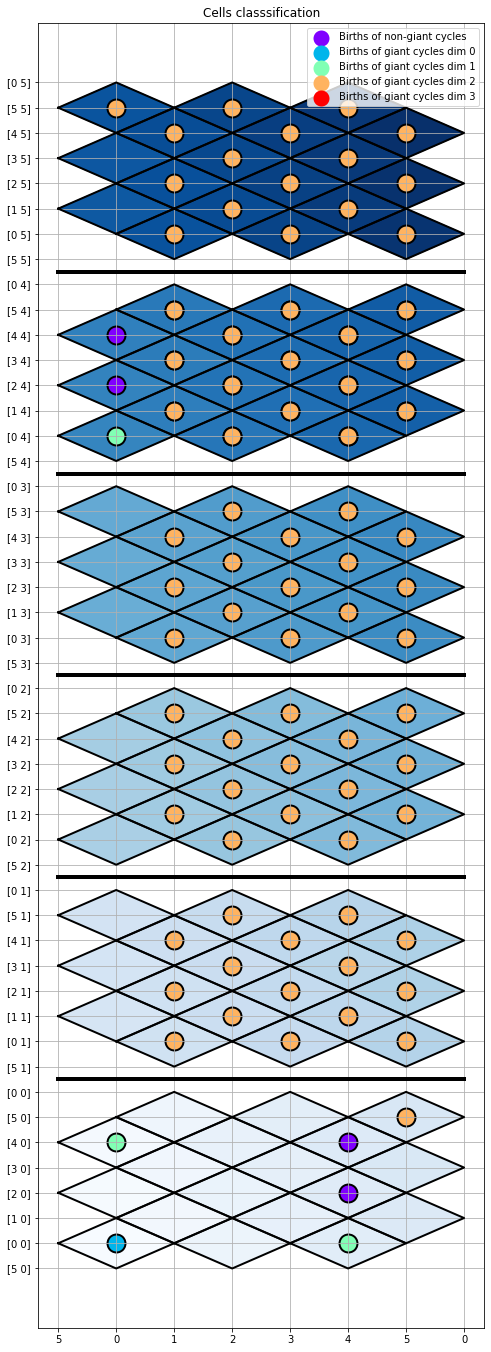

In [177]:
plt.figure(figsize=(8, 24))
fc.draw_filtration(colormap='Blues', edgecolor='black')
plt.title('Cells classsification')

plt.xticks(np.arange(-1, 2*m+1), np.arange(-1, 2*m+1)%(2*m))
plt.yticks(fc.yticks, fc.ylabels % np.array([2*n, 2*k]))

colors = np.arange(5)/4
colors = [cm['rainbow'](i) for i in colors]

x, y = fc.cords[np.isin(filtration, info[(info['Death'] != np.inf)]['Birth'].values)].mean(axis=1).transpose()
plt.scatter(x, y, color='black', linewidth=14)
plt.scatter(x, y, color=colors[0], linewidth=10, label='Births of non-giant cycles')
x, y = fc.cords[np.isin(filtration, info[(info['Death'] == np.inf)&(info['Dimension'] == 0)]['Birth'].values)].mean(axis=1).transpose()
plt.scatter(x, y, color='black', linewidth=14)
plt.scatter(x, y, color=colors[1], linewidth=10, label='Births of giant cycles dim 0')
x, y = fc.cords[np.isin(filtration, info[(info['Death'] == np.inf)&(info['Dimension'] == 1)]['Birth'].values)].mean(axis=1).transpose()
plt.scatter(x, y, color='black', linewidth=14)
plt.scatter(x, y, color=colors[2], linewidth=10, label='Births of giant cycles dim 1')
x, y = fc.cords[np.isin(filtration, info[(info['Death'] == np.inf)&(info['Dimension'] == 2)]['Birth'].values)].mean(axis=1).transpose()
plt.scatter(x, y, color='black', linewidth=14)
plt.scatter(x, y, color=colors[3], linewidth=10, label='Births of giant cycles dim 2')
x, y = fc.cords[np.isin(filtration, info[(info['Death'] == np.inf)&(info['Dimension'] == 3)]['Birth'].values)].mean(axis=1).transpose()
plt.scatter(x, y, color='black', linewidth=14)
plt.scatter(x, y, color=colors[4], linewidth=10, label='Births of giant cycles dim 3')

for i in range(2*n - 1):
    plt.plot([-1, 2*m], np.ones(2)*2*i*(k+1) + 2*k + 0.5, color='black', linewidth=4)
    
plt.legend()
plt.grid(True)
plt.show()

In [165]:
print('Nongiant cycles:', len(info[info['Death'] != np.inf]))
print('Giant cycles dim 0:', len(info[(info['Death'] == np.inf)&(info['Dimension'] == 0)]))
print('Giant cycles dim 1:', len(info[(info['Death'] == np.inf)&(info['Dimension'] == 1)]))
print('Giant cycles dim 2:', len(info[(info['Death'] == np.inf)&(info['Dimension'] == 2)]))
print('Giant cycles dim 3:', len(info[(info['Death'] == np.inf)&(info['Dimension'] == 3)]))

Nongiant cycles: 19
Giant cycles dim 0: 1
Giant cycles dim 1: 3
Giant cycles dim 2: 218
Giant cycles dim 3: 0


In [166]:
info2 = info[(info['Death'] == np.inf)&(info['Dimension'] == 2)]['Birth'].values
info2 = pd.DataFrame([[i,(info2 == i).sum()] for i in np.unique(info2)], columns=['Birth', 'Count'])
info2.groupby('Count').count().transpose()

Count,1,2,4,5,7
Birth,2,48,21,3,3


In [167]:
assert (info2.groupby('Count').count().index.values * info2.groupby('Count').count()['Birth'].values).sum() == len(info[(info['Death'] == np.inf)&(info['Dimension'] == 2)])

/usr/local/lib64/python3.10/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
/usr/local/lib64/python3.10/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


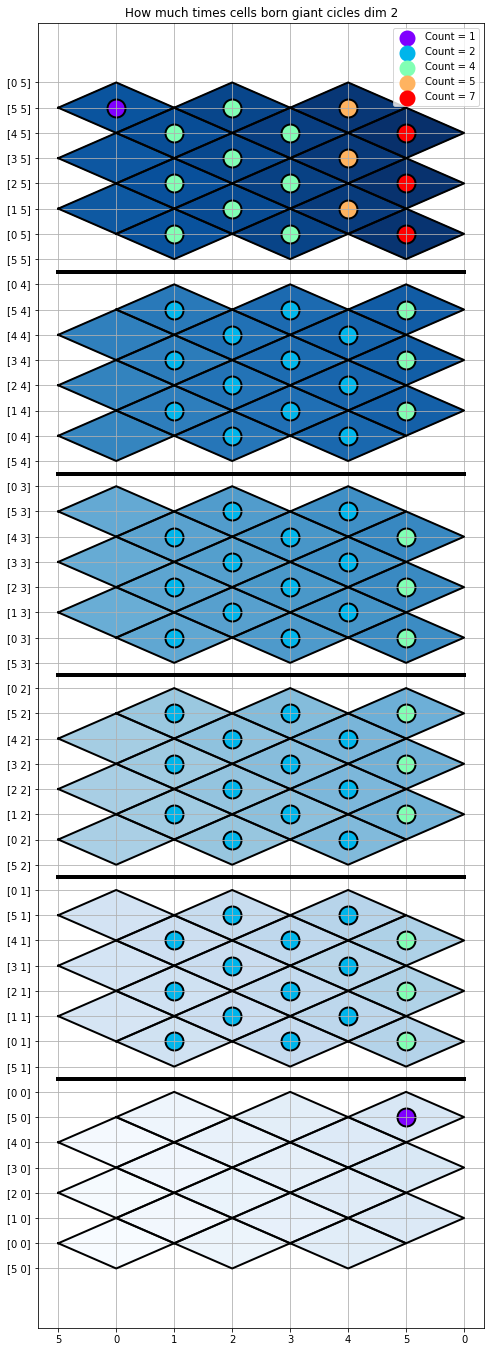

In [178]:
plt.figure(figsize=(8, 24))
plt.title('How much times cells born giant cicles dim 2')
fc.draw_filtration(colormap='Blues', edgecolor='black')

plt.xticks(np.arange(-1, 2*m+1), np.arange(-1, 2*m+1)%(2*m))
plt.yticks(fc.yticks, fc.ylabels % np.array([2*n, 2*k]))

counts = np.unique(info2['Count'])
colors = np.arange(len(counts)) / max(1, len(counts)-1)
colors = [cm['rainbow'](i) for i in colors]
for i in range(len(counts)):
    x, y = fc.cords[np.isin(filtration, info2[(info2['Count'] == counts[i])]['Birth'].values)].mean(axis=1).transpose()
    plt.scatter(x, y, color='black', linewidth=14)
    plt.scatter(x, y, facecolor=colors[i], linewidth=10, label='Count = {0}'.format(counts[i]))

for i in range(2*n - 1):
    plt.plot([-1, 2*m], np.ones(2)*2*i*(k+1) + 2*k + 0.5, color='black', linewidth=4)
    
plt.legend()
plt.grid(True)
plt.show()

In [174]:
df_vc = pd.DataFrame([[i, (fc.cells==i).sum()] for i in np.unique(fc.cells)], columns=['Vertex', 'Count'])
df_vc.head(24)

,Vertex,Count
0,1,16
1,3,16
2,5,16
3,6,16
4,8,16
5,10,16
6,13,16
7,15,16
8,17,16
9,18,16


In [170]:
for i in np.unique(df_vc['Count']):
    arr = df_vc[df_vc['Count'] == i]['Vertex'].values
    print(str(i) + ':    length: ' + str(len(arr)) + '\n' + arr.__str__())

16:    length: 108
[  1   3   5   6   8  10  13  15  17  18  20  22  25  27  29  30  32  34
  36  38  40  43  45  47  48  50  52  55  57  59  60  62  64  67  69  71
  73  75  77  78  80  82  85  87  89  90  92  94  97  99 101 102 104 106
 108 110 112 115 117 119 120 122 124 127 129 131 132 134 136 139 141 143
 145 147 149 150 152 154 157 159 161 162 164 166 169 171 173 174 176 178
 180 182 184 187 189 191 192 194 196 199 201 203 204 206 208 211 213 215]


In [171]:
vertex_types = [df_vc[df_vc['Count'] == i]['Vertex'].values[0]  for i in np.unique(df_vc['Count'])]
for vertex in vertex_types:
    print('You can find the vertex', vertex, 'in simplices:')
    print(fc.cells[(fc.cells == vertex).any(axis=-1)])

You can find the vertex 1 in simplices:
[[5 1 6 36]
 [5 1 6 180]
 [5 1 30 36]
 [5 1 30 180]
 [36 38 43 1]
 [36 38 67 1]
 [180 182 187 1]
 [180 182 211 1]
 [6 8 1 43]
 [6 8 1 187]
 [30 32 1 67]
 [30 32 1 211]
 [1 3 8 38]
 [1 3 8 182]
 [1 3 32 38]
 [1 3 32 182]]


In [202]:
from package.cycles import get_simplex_filtration_dict
simplex_filtration_dict = get_simplex_filtration_dict(fc.simplextree)


birth_types = {i: info2[info2['Count'] == i]['Birth'].values[0] for i in np.unique(info2['Count'])}
for birth_type in birth_types:
    print('Count =', birth_type)
    
    for pair in fc.simplextree.persistence_pairs():
        if simplex_filtration_dict[tuple(np.sort(pair[0]))] == birth_types[birth_type]:
            print('Birth simplex: {0:16}'.format(str(pair[0])), 
                  'Death simplex: {0:16}'.format(str(pair[1])))
    print()

Count = 1
Birth simplex: [211, 204, 174]  Death simplex: []              

Count = 2
Birth simplex: [43, 6, 1]       Death simplex: []              
Birth simplex: [187, 6, 1]      Death simplex: []              

Count = 4
Birth simplex: [67, 30, 1]      Death simplex: []              
Birth simplex: [67, 30, 25]     Death simplex: []              
Birth simplex: [211, 30, 1]     Death simplex: []              
Birth simplex: [211, 30, 25]    Death simplex: []              

Count = 5
Birth simplex: [60, 59, 29]     Death simplex: []              
Birth simplex: [64, 59, 29]     Death simplex: []              
Birth simplex: [71, 64, 29]     Death simplex: []              
Birth simplex: [101, 60, 59]    Death simplex: []              
Birth simplex: [101, 64, 59]    Death simplex: []              

Count = 7
Birth simplex: [34, 30, 29]     Death simplex: []              
Birth simplex: [71, 30, 5]      Death simplex: []              
Birth simplex: [71, 30, 29]     Death simplex: [] 